In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
#Set step, paths, pfts and run all

STEP = 4

STEP1_results = '/data/workflows/US-Prr-STEP1-SA/results.csv'
STEP1_sample_matrix = '/data/workflows/US-Prr-STEP1-SA/sample_matrix.csv'

STEP2_results = '/data/workflows/US-Prr-STEP2-SA/results.csv'
STEP2_sample_matrix = '/data/workflows/US-Prr-STEP2-SA/sample_matrix.csv'

STEP3_results = '/data/workflows/US-Prr-STEP3-SA-v2/results.csv'
STEP3_sample_matrix = '/data/workflows/US-Prr-STEP3-SA-v2/sample_matrix.csv'

#STEP3_results = 'results_US-Prr_STEP3.csv'
#STEP3_sample_matrix = 'sample_matrix_US-Prr_STEP3.csv'

STEP4_results = '/data/workflows/US-Prr-STEP4-SA/results.csv'
STEP4_sample_matrix = '/data/workflows/US-Prr-STEP4-SA/sample_matrix.csv'

#STEP4_results = '/data/workflows/US-Prr-STEP4-SA/results.csv'
#STEP4_sample_matrix = '/data/workflows/US-Prr-STEP4-SA/sample_matrix.csv'

pfts=['Black Spruce', 'Moss (Sphagnum dominant)', 'Shrubs (Deciduous Dominant)', 'Tussock Cottongrass', 'Reindeer Lichen']

In [3]:
if STEP == 3:
    target_vars = [
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=[
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']

In [4]:
#if number of pfts != 5 you will have to adjust these values

if STEP == 1:
    target_vars = ['GPP1', 'GPP2', 'GPP3', 'GPP4', 'GPP5']
    
    calib_params = [['cmax', 'cmax.1', 'cmax.2', 'cmax.3', 'cmax.4']] # here for reference
    
    vars_nopft= ['GPP']

if STEP == 2:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2']]
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 3:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2'],
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4', # here for reference
                    'krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
                    'krb(1)','krb(1).1',
                    'krb(2)','krb(2).1','krb(2).2',
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 4:
    target_vars = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']
    
    calib_params = [['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']] # here for reference
    calib_params_flat = ['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
    vars_nopft= ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']


In [5]:
def Filter(string_list, substr):
    """ filters list of strings for items containing substring """
    return [str for str in string_list if
             any(sub in str for sub in substr)]

In [6]:
def calc_rmse(x,y):
    """ Return rmse where x and y are array-like """
    return ((x-y) ** 2).mean() ** .5

In [7]:
def calc_overall_accuracy(results, sample_matrix, target_vars, vars_nopft):
    
    results = pd.read_csv(results, names=target_vars)
    #print(results)
    # extract targets from last row of results csv
    targets = results.loc[len(results)-1] 
    results = results.loc[0:len(results)-2]
    
    r2s = []
    rmses=[]
    
    #calculate r2s and rmse for individual variables 
    for index, row in results.iterrows():
        
        tgt_r2s = []
        tgt_rmses = []
        
        for var_nopft in vars_nopft:
            
            results_vars_cols = Filter(results, [var_nopft])
            if row[results_vars_cols].isna().values.any():
                tgt_r2s.append(0)
                tgt_rmses.append(10000000)
                continue
            tgt_r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
            tgt_rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))  
            
        #r2s.append(tgt_r2s)
        #rmses.append(tgt_rmses)
        r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
        rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))

    # concatenate sample matrix to results
    sample_matrix = pd.read_csv(sample_matrix)
    results[sample_matrix.columns] = sample_matrix
    r2s=np.array(r2s)
    rmses=np.array(rmses)
    results['r2']= r2s
    results['rmse']= rmses
    #iterate over target variables (no pft or compartment)
    #for idx, name in enumerate(vars_nopft):
        
        #set r2 and rmse columns
    #    results[name + '_r2_raw'] = r2s[:, idx]
    #    results[name + '_rmse_raw'] = rmses[:, idx]
        
    #    #scale rmse between min and max
    #    results[name + '_rmse_scaled'] = (results[name + '_rmse_raw']-np.nanmin(results[name + '_rmse_raw']))/(np.max(results[name + '_rmse_raw'])-np.nanmin(results[name + '_rmse_raw']))
        
    #    #subrtact scaled rmse from r2 for overall accuracy term
    #    results[name + '_accuracy'] = (results[name + '_r2_raw']-results[name+'_rmse_scaled'])
    
    #scale r2 and rmse and combine for overall accuracy term
    results['rmse_scaled'] = (results['rmse']-np.nanmin(results['rmse']))/(np.max(results['rmse'])-np.nanmin(results['rmse']))
    results['overall_accuracy'] = (results['r2']-results['rmse_scaled'])
    results['mean_rmse'] = results[Filter(list(results.columns), ['rmse'])].mean(axis=1)
    results['mean_r2'] = results[Filter(list(results.columns), ['r2'])].mean(axis=1)
    
    return results, targets

In [8]:
if STEP == 1:
    results, targets = calc_overall_accuracy(STEP1_results, STEP1_sample_matrix, target_vars, vars_nopft)
if STEP == 2:
    results, targets = calc_overall_accuracy(STEP2_results, STEP2_sample_matrix, target_vars, vars_nopft)
    
if STEP == 3:
    results, targets = calc_overall_accuracy(STEP3_results, STEP3_sample_matrix, target_vars, vars_nopft)

if STEP == 4:
    results, targets = calc_overall_accuracy(STEP4_results, STEP4_sample_matrix, target_vars, vars_nopft)

print('{} runs'.format(len(results)))


/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

500 runs


In [9]:
results['mean_r2']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: mean_r2, Length: 500, dtype: float64

In [10]:
#get indices of top 15 performing parameter sets
perf = np.argsort(results['overall_accuracy'])[::-1]
#perf = np.argsort(results['mean_rmse'])[::-1]
top = perf[:8].values.tolist()
first = perf[:1].values.tolist()

(0.0, 1.0)

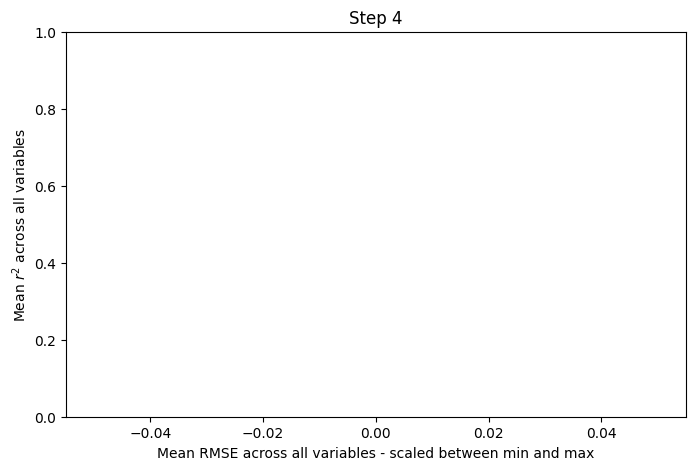

In [11]:
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = results, x='mean_rmse', y='mean_r2')
sns.scatterplot(data = results.iloc[top], x='mean_rmse', y='mean_r2', color='red')
sns.scatterplot(data = results.iloc[first], x='mean_rmse', y='mean_r2', color='yellow')

ax.title.set_text('Step {}'.format(STEP))
ax.set_ylabel('Mean $r^2$ across all variables')
ax.set_xlabel('Mean RMSE across all variables - scaled between min and max')
plt.ylim(0,1)
#plt.xlim(0,1)

In [12]:
results.columns

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum', 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr',
       'kdcsomcr', 'r2', 'rmse', 'rmse_scaled', 'overall_accuracy',
       'mean_rmse', 'mean_r2'],
      dtype='object')

In [13]:
palette = sns.color_palette("mako", as_cmap=True)

if STEP == 1:
    fig, axes = plt.subplots(2,3, figsize = (8,5))
    fig.suptitle('STEP 1 cmax vs GPP for each PFT')

    axes[0,0].axhline(targets['GPP1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax', y='GPP1', ax=axes[0,0], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax', y='GPP1', ax=axes[0,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax', y='GPP1', ax=axes[0,0], color='yellow', legend=False)
    axes[0,0].title.set_text(pfts[0])

    axes[0,1].axhline(targets['GPP2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.1', y='GPP2', ax=axes[0,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.1', y='GPP2', ax=axes[0,1], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.1', y='GPP2', ax=axes[0,1], color='yellow', legend=False)
    axes[0,1].title.set_text(pfts[1])

    axes[0,2].axhline(targets['GPP3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.2', y='GPP3', ax=axes[0,2], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.2', y='GPP3', ax=axes[0,2], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.2', y='GPP3', ax=axes[0,2], color='yellow', legend=False)
    axes[0,2].title.set_text(pfts[2])

    axes[1,0].axhline(targets['GPP4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)
    sns.scatterplot(data = results.iloc[top], x='cmax.3', y='GPP4', ax=axes[1,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.3', y='GPP4', ax=axes[1,0], color='yellow', legend=False)
    axes[1,0].title.set_text(pfts[3])

    axes[1,1].axhline(targets['GPP5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.4', y='GPP5', ax=axes[1,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.4', y='GPP5', ax=axes[1,1], color='red', label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='cmax.4', y='GPP5', ax=axes[1,1], color='yellow', label='Top run')
    axes[1,1].title.set_text(pfts[4])

    #axes[1,1].legend(loc='lower right', bbox_to_anchor=(1,0), title='Overall Accuracy')
   
    fig.tight_layout()


In [14]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax', y='NPPAll1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='nmax', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.1', y='NPPAll2', ax=axes[0,1], hue='krb(0).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')

    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.2', y='NPPAll3', ax=axes[0,2], hue='krb(0).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.3', y='NPPAll4', ax=axes[1,0], hue='krb(0).3', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax.3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax.4', y='NPPAll5', ax=axes[1,1], hue='krb(0).4', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='nmax.4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='nmax.4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(0)')

    fig.tight_layout()


In [15]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 VEGC for Black Spruce')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')

    axes[0,1].axhline(targets['VegCarbonStem1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonStem1', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Black Spruce')
    
    axes[0,2].axhline(targets['VegCarbonRoot1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='VegCarbonRoot1', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Black Spruce')


    fig.tight_layout()


In [16]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='VegCarbonLeaf2', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Moss')


    fig.tight_layout()

In [17]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonLeaf3', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Shrub')

    axes[0,1].axhline(targets['VegCarbonStem3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonStem3', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Shrub')
    
    axes[0,2].axhline(targets['VegCarbonRoot3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='VegCarbonRoot3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')


    fig.tight_layout()

In [18]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonLeaf4', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Sedge')


    
    axes[0,2].axhline(targets['VegCarbonRoot4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], hue='krb(0)', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='VegCarbonRoot4', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Sedge')


    fig.tight_layout()

In [19]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 nmax vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], hue='krb(0).1', alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='VegCarbonLeaf5', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Lichen')


    fig.tight_layout()

In [20]:
if STEP == 2:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 krb(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['NPPAll1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y='NPPAll1', ax=axes[0,0], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y='NPPAll1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    axes[0,0].set_xlim(-8,0)

    axes[0,1].axhline(targets['NPPAll2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).1', y='NPPAll2', ax=axes[0,1], hue='krb(2)', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).1', y='NPPAll2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss (Sphagnum dominant)')
    axes[0,1].set_xlim(-5,0)
    
    axes[0,2].axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).2', y='NPPAll3', ax=axes[0,2], hue='krb(2).1', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).2', y='NPPAll3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrubs (Evergreen Dominant)')
    axes[0,2].set_xlim(-5,0)

    axes[1,0].axhline(targets['NPPAll4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).3', y='NPPAll4', ax=axes[1,0], hue='krb(2).2', legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0).3', y='NPPAll4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('Tussock Cottongrass')
    axes[1,0].set_xlim(-5,0)

    axes[1,1].axhline(targets['NPPAll5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0).4', y='NPPAll5', ax=axes[1,1], hue='krb(2)', legend=True, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='red',label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='krb(0).4', y='NPPAll5', ax=axes[1,1], color='yellow',label='Top run')
    axes[1,1].title.set_text('Reindeer Lichen')
    axes[1,1].set_xlim(-5,0)

    axes[1,1].legend(loc='lower right', bbox_to_anchor=(0,-.5), title='krb(2)')

    fig.tight_layout()

In [21]:
if STEP == 3:
    fig, axes = plt.subplots(2,3, figsize = (10,8))
    fig.suptitle('STEP 2 cfall(0) vs NPPAll for each PFT')

    axes[0,0].axhline(targets['VegCarbonLeaf1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y='VegCarbonLeaf1', ax=axes[0,0], color='yellow',legend=False)
    axes[0,0].title.set_text('Black Spruce')
    
    axes[0,1].axhline(targets['VegCarbonLeaf2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).1', y='VegCarbonLeaf2', ax=axes[0,1], color='yellow',legend=False)
    axes[0,1].title.set_text('Moss')
    axes[0,1].set_ylim(0, 400)
    
    axes[0,2].axhline(targets['VegCarbonLeaf3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).2', y='VegCarbonLeaf3', ax=axes[0,2], color='yellow',legend=False)
    axes[0,2].title.set_text('Shrub')
    axes[0,2].set_ylim(0, 50)
    
    axes[1,0].axhline(targets['VegCarbonLeaf4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).3', y='VegCarbonLeaf4', ax=axes[1,0], color='yellow',legend=False)
    axes[1,0].title.set_text('sedge')
    axes[1,0].set_ylim(0, 50)
    
    axes[1,1].axhline(targets['VegCarbonLeaf5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], legend=False, alpha=0.3)
    sns.scatterplot(data = results.iloc[top], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0).4', y='VegCarbonLeaf5', ax=axes[1,1], color='yellow',legend=False)
    axes[1,1].title.set_text('lichen')
    axes[1,1].set_ylim(0, 50)

In [22]:
results.sort_values(by='mean_rmse')[-15:].index

Index([366, 478, 358, 410, 25, 37, 397, 446, 490, 440, 45, 330, 455, 82, 225], dtype='int64')

In [52]:
def spaghetti_match_plot(df_x,df_y,logy=False):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    fig, ax=plt.subplots()
    #ax = df_y.transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5))
    
    nrange=range(len(df_y.columns))
    df_x.plot(logy=logy,legend=True,style="o",color='red',xticks=nrange, rot=90, label="Targets", ax=ax);
    
    #top=results.sort_values(by='mean_rmse', ascending=False)[:50].index
    #results[target_vars].iloc[results['mean_rmse'].idxmin()].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    #results[target_vars].iloc[41].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='yellow',ax=ax)
    results[target_vars].iloc[top].transpose().plot(logy=logy,legend=False,alpha=0.5,figsize=(10,5), color='red',ax=ax)
    
    df_x.plot(logy=logy,legend=False,style="o",color='red',xticks=nrange, rot=90,ax=ax)
    ax.set_xticklabels(df_y.columns,fontsize=12)
    
target_df=pd.DataFrame(targets).reset_index()
target_df.columns=['variable', 'value']

In [53]:
if STEP==2:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [54]:
if STEP==3:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)

In [55]:
corr = results[target_vars + calib_params_flat].corr()

corr= corr.drop(columns=calib_params_flat)
corr = corr.loc[calib_params_flat]


<AxesSubplot:>

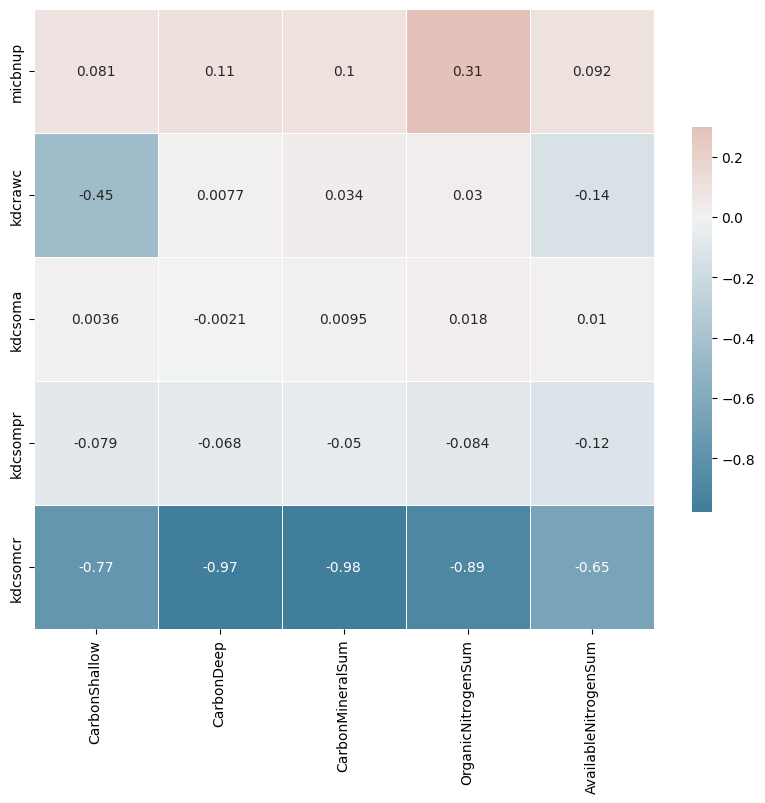

In [56]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


minmax=results[calib_params_flat].iloc[top].apply(minMax)

In [58]:
minmax.columns

Index(['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr'], dtype='object')

In [59]:
for index, row in minmax.iterrows():
    print(row)


micbnup     2.693218
kdcrawc     0.187878
kdcsoma     0.265635
kdcsompr    0.204121
kdcsomcr    0.000060
Name: min, dtype: float64
micbnup     2.693218
kdcrawc     0.187878
kdcsoma     0.265635
kdcsompr    0.204121
kdcsomcr    0.000060
Name: max, dtype: float64


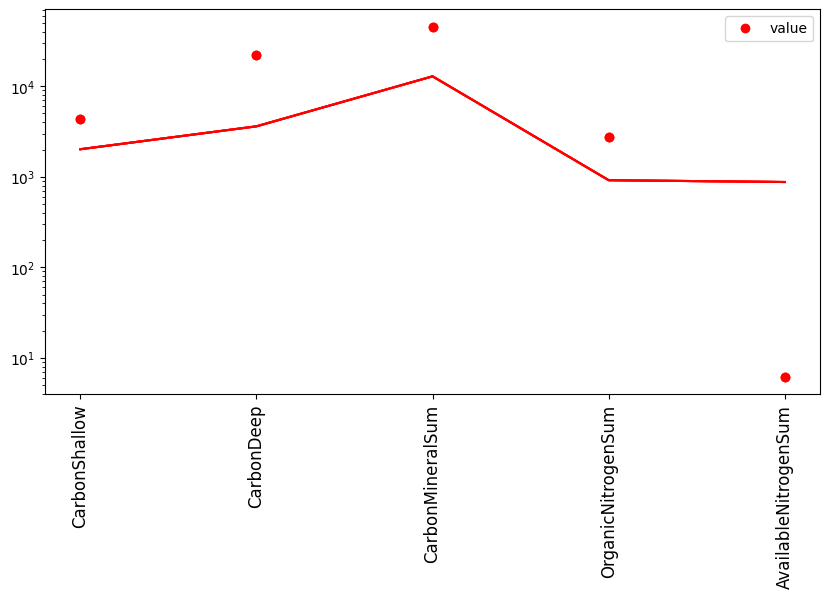

In [60]:
if STEP==4:
    spaghetti_match_plot(target_df, results[target_vars], logy=True)


In [32]:
results.sort_values(by='CarbonDeep', ascending=False).head(20)

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
495,4097.368690,14194.973393,29800.575554,1469.907414,1601.172229,1.345712,0.193940,0.168754,0.001235,3.926601e-06,NaN,1595.018403,0.688678,NaN,797.853540,NaN
20,2578.286035,13607.756335,33263.441725,1505.928592,951.731364,1.892378,0.090955,0.600173,0.080079,1.356929e-08,NaN,945.577538,0.317107,NaN,472.947323,NaN
42,2290.405602,13412.331344,35027.638768,1372.177028,1046.749371,2.321694,0.781761,0.281736,0.093563,1.354624e-07,NaN,1040.595545,0.371471,NaN,520.483508,NaN
325,2271.979936,13399.205144,35166.540094,1377.427598,1049.989872,2.032320,1.022653,0.757010,0.074660,1.113093e-07,NaN,1043.836046,0.373325,NaN,522.104685,NaN
248,2318.433868,13294.052269,34540.153679,1321.356771,1071.556019,2.714036,1.227938,0.606853,0.014846,6.878955e-07,NaN,1065.402193,0.385664,NaN,532.893928,NaN
183,2326.670026,13217.006986,34690.276106,1411.277485,1047.522367,1.702880,0.476039,0.525202,0.058773,1.438243e-06,NaN,1041.368541,0.371913,NaN,520.870227,NaN
292,2387.759197,13199.516407,34321.213942,1385.331959,1008.240364,1.726110,0.595414,0.027779,0.146230,1.130353e-06,NaN,1002.086538,0.349438,NaN,501.217988,NaN
319,3219.550751,13038.160497,30652.884258,1481.054852,846.978128,1.401357,0.030387,0.069871,0.065389,2.785321e-06,NaN,840.824302,0.257174,NaN,420.540738,NaN
237,2308.060472,13012.995161,34081.521557,1348.595822,1067.567205,1.701687,1.394426,0.312921,0.017475,1.915647e-06,NaN,1061.413379,0.383382,NaN,530.898380,NaN
403,2292.667618,12930.054264,34330.274616,1382.733814,1056.503569,1.228023,0.786852,0.717777,0.049877,2.256549e-06,NaN,1050.349743,0.377052,NaN,525.363398,NaN


In [33]:
targets

CarbonShallow            4362.190000
CarbonDeep              22396.020000
CarbonMineralSum        45220.400000
OrganicNitrogenSum       2748.367000
AvailableNitrogenSum        6.153826
Name: 500, dtype: float64

In [34]:
results.iloc[[495,400,63,162, 119, 144]]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
495,4097.368690,14194.973393,29800.575554,1469.907414,1601.172229,1.345712,0.193940,0.168754,0.001235,0.000004,NaN,1595.018403,0.688678,NaN,797.853540,NaN
400,2188.834021,6181.688677,16833.641656,701.050265,1525.872160,1.801905,0.775425,0.234107,0.002610,0.000050,NaN,1519.718334,0.645596,NaN,760.181965,NaN
63,2507.752017,7411.852154,20266.014211,1005.573874,1302.724005,2.317164,0.753355,0.014622,0.003251,0.000036,NaN,1296.570179,0.517924,NaN,648.544052,NaN
162,2471.724845,9618.601781,25311.486280,994.010184,1187.123432,2.170986,0.988527,0.568469,0.003083,0.000022,NaN,1180.969606,0.451784,NaN,590.710695,NaN
119,2181.350430,6833.282082,18647.888265,768.391113,1478.482952,2.020657,1.465740,0.086005,0.003072,0.000043,NaN,1472.329126,0.618483,NaN,736.473804,NaN
144,2688.406375,9818.496900,26152.552545,1060.501563,1161.053921,1.549651,0.250431,0.071426,0.005763,0.000017,NaN,1154.900095,0.436869,NaN,577.668482,NaN


In [35]:
print(results.iloc[[144,63,400,495]]['micbnup'].min())
print(results.iloc[[144,63,400,495]]['micbnup'].max())


1.3457121414208952
2.317164463826037


In [36]:
print(results.iloc[[144,63,400,495]]['kdcrawc'].min())
print(results.iloc[[144,63,400,495]]['kdcrawc'].max())

0.1939403000574291
0.7754247042708042


In [37]:
print(results.iloc[[144,63,400,495]]['kdcsoma'].min())
print(results.iloc[[144,63,400,495]]['kdcsoma'].max())

0.0146219778370054
0.2341066981378259


In [38]:
print(results.iloc[[144,63,400,495]]['kdcsompr'].min())
print(results.iloc[[144,63,400,495]]['kdcsompr'].max())

0.0012349104016401
0.0057631126428844


In [39]:
print(results.iloc[[144,63,400,495]]['kdcsomcr'].min())
print(results.iloc[[144,63,400,495]]['kdcsomcr'].max())

3.926601238360859e-06
4.962397256615921e-05


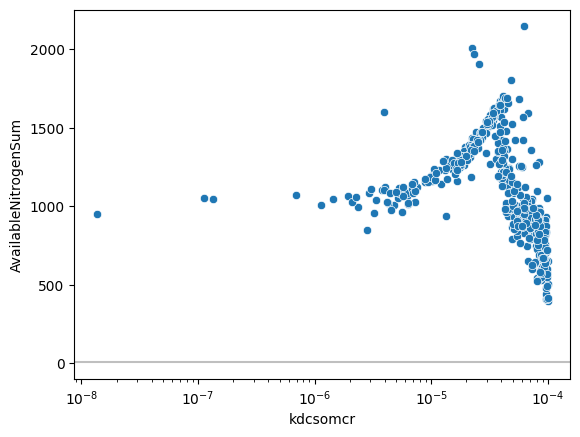

In [40]:
sns.scatterplot(data=results, x='kdcsomcr', y='AvailableNitrogenSum')
plt.axhline(targets['AvailableNitrogenSum'], color='grey', alpha=0.5)
plt.xscale('log')

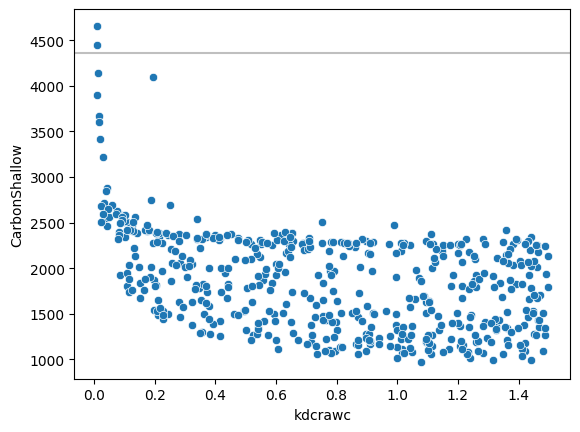

In [41]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonShallow')
plt.axhline(targets['CarbonShallow'], color='grey', alpha=0.5)

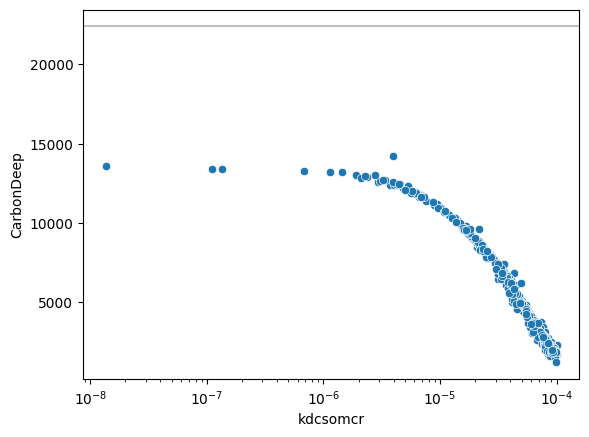

In [42]:
sns.scatterplot(data=results, x='kdcsomcr', y='CarbonDeep')
plt.axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
plt.xscale('log')

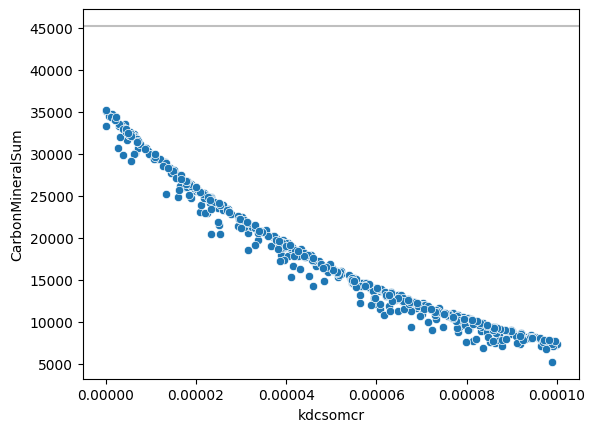

In [43]:
sns.scatterplot(data=results, x='kdcsomcr', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

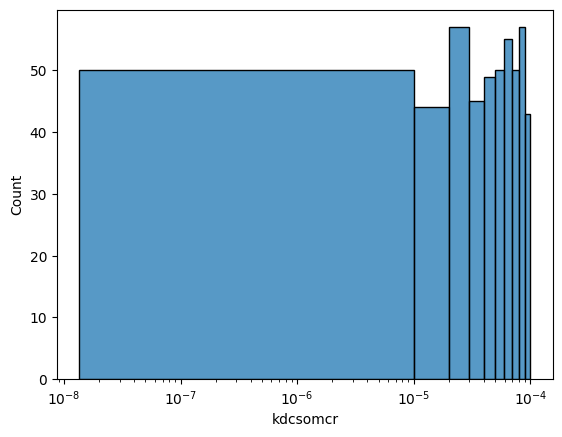

In [44]:
sns.histplot(data=results, x='kdcsomcr')
plt.xscale("log")

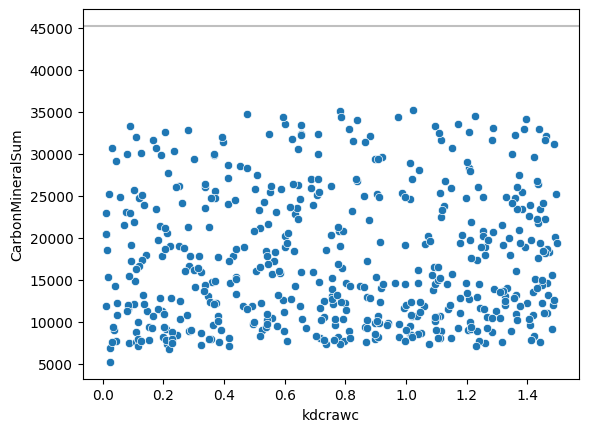

In [45]:
sns.scatterplot(data=results, x='kdcrawc', y='CarbonMineralSum')
plt.axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)

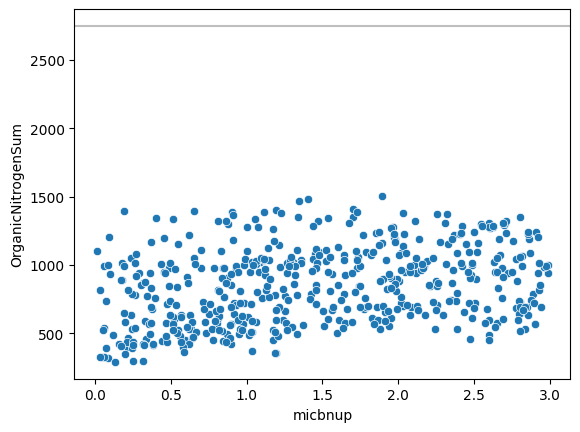

In [46]:
sns.scatterplot(data=results, x='micbnup', y='OrganicNitrogenSum')
plt.axhline(targets['OrganicNitrogenSum'], color='grey', alpha=0.5)

In [47]:
pd.melt(pd.DataFrame(targets))

,variable,value
0,500,4362.190000
1,500,22396.020000
2,500,45220.400000
3,500,2748.367000
4,500,6.153826


In [48]:
pd.DataFrame(targets)

,500
CarbonShallow,4362.190000
CarbonDeep,22396.020000
CarbonMineralSum,45220.400000
OrganicNitrogenSum,2748.367000
AvailableNitrogenSum,6.153826


In [49]:
targets.index

Index(['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum',
       'AvailableNitrogenSum'],
      dtype='object')

In [50]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import loguniform

In [51]:
from scipy.stats import loguniform

def generate_loguniform_sample(a, b, size=10):
    """
    Generate a random sample of size 'size' from a log uniform distribution for elements within the interval (a, b).
    
    Parameters:
        a (float): Lower bound of the interval.
        b (float): Upper bound of the interval.
        size (int): Number of elements in the sample (default is 10).
    
    Returns:
        numpy.ndarray: An array of size 'size' containing random samples from the log uniform distribution.
    """
    min_val = a
    max_val = b
    spread=b-a
    loguniform_samples = loguniform.rvs(min_val,max_val,size=size)
    return loguniform_samples

# Example usage:
a = 1e-15
b = 1e-12
sample = generate_loguniform_sample(a, b, size=500)
print("Generated Sample:", sample)

Generated Sample: [2.46059236e-15 1.15164572e-13 8.91058651e-14 1.29658828e-15
 5.48666706e-14 1.33719820e-15 6.34649368e-14 1.00475159e-13
 2.72473085e-15 2.39681901e-15 1.27304742e-13 1.48763399e-15
 2.00832558e-14 9.98806687e-14 4.31987362e-15 2.05611514e-13
 8.62332348e-13 2.44300060e-13 1.64472848e-13 1.24725882e-13
 3.34461515e-13 2.97566465e-13 1.42122836e-15 1.14298797e-15
 1.37919077e-14 3.76535504e-15 6.26153630e-14 1.14324500e-13
 1.17064106e-14 2.43801824e-14 3.08363796e-13 2.35132253e-14
 2.00531398e-13 2.94539420e-14 6.50822615e-14 1.34561853e-14
 3.12365449e-14 5.15478603e-13 2.75636351e-14 9.32770262e-14
 6.30522702e-15 1.36981979e-13 4.25692539e-14 1.25182791e-15
 2.94506729e-15 2.73961108e-15 1.49491182e-14 1.75491948e-15
 4.19010719e-14 8.62356792e-13 8.39178457e-14 5.51356031e-13
 4.66961752e-14 1.05286686e-15 1.25899469e-13 2.63576410e-13
 1.75917108e-13 3.13737185e-15 2.85937819e-15 9.90345056e-14
 3.34049397e-14 1.07334240e-14 2.56376560e-14 1.80931647e-15
 9.685